<div align="left">
<img align="left" src="datasciencebowl.png" >
<div> <b> Kaggle </b></div>
<div> 2018 Data Science Bowl </div>
<div> Pedro D. Marrero Fernandez</div>
<div> https://www.kaggle.com/c/data-science-bowl-2018/discussion/47770 </div>
<div> :), :(, :/</div>
</div>

In [1]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import csv
from skimage import color
import scipy.misc

from deep.datasets import imageutl as imutl
from deep.datasets import utility as utl
from deep import visualization as view
from deep.datasets import dsxbdata 
from deep.datasets import dsxbtransform as dsxbtrans


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [2]:

pathdataset      = '../db'
namedataset      = 'databoewlex'
sub_folder       =  'train'
folders_images   = 'images'
folders_labels   = 'labels'
folders_contours = 'contours'
folders_weights  = 'weights'

pathname = os.path.join(pathdataset, namedataset);
dataloader = imutl.dsxbExProvide(
    pathname, 
    sub_folder, 
    folders_images, 
    folders_labels,
    folders_contours,
    folders_weights,
    'png'
    )

print(len(dataloader))
print(':)!!!')


9
:)!!!


In [3]:
def summary( data ):
    print(np.min(data), np.max(data), data.shape  )

7
3 218 (250, 250, 3)
0 255 (250, 250)
0 255 (250, 250)
0.339 14.147 (250, 250)


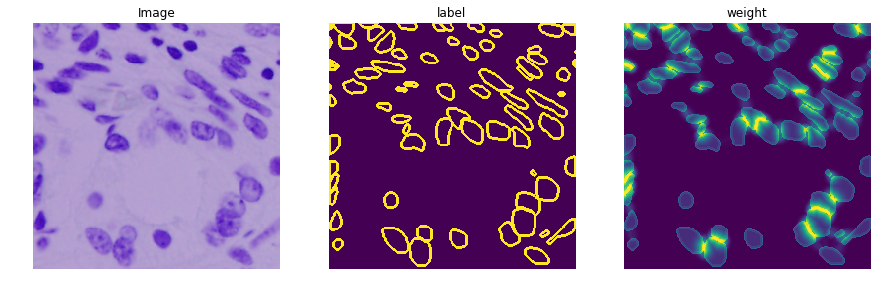

In [4]:
i = np.random.randint( len(dataloader) )
image, label, contours, weight = dataloader[i]

print(i)
summary(image)
summary(label)
summary(contours)
summary(weight)


plt.figure( figsize=(15,15) )
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(contours)
plt.title('label')
plt.axis('off')
plt.subplot(133)
plt.imshow(weight)
plt.title('weight')
plt.axis('off')


plt.show()


In [4]:
## estadisticas ....

# DATA LOADER 

0 torch.Size([4, 3, 250, 250]) torch.Size([4, 3, 250, 250]) torch.Size([4, 1, 250, 250])
52.0 194.0 torch.Size([250, 250])
0.0 0.0 torch.Size([250, 250])
0.26499998569488525 42.784000396728516 torch.Size([250, 250])


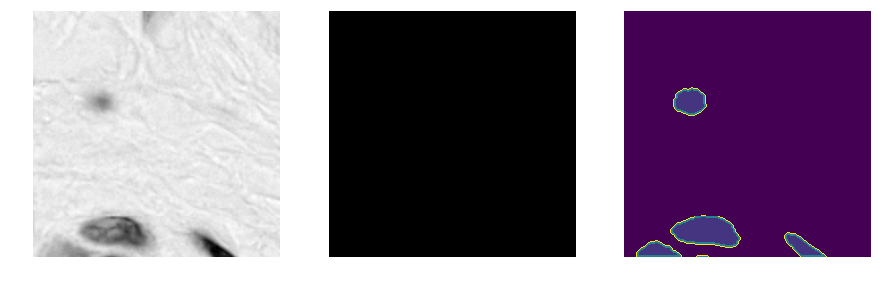

In [7]:

pathdataset     = '../db'
namedataset     = 'databoewlex'
sub_folder      =  'train'
folders_images  = 'images'
folders_labels  = 'labels'
folders_weights = 'weights'

base_folder = os.path.join(pathdataset, namedataset) 


data = dsxbdata.DSXBDataset(
        base_folder, 
        sub_folder, 
        transform=transforms.Compose([ 
            dsxbtrans.ToTensor() ])
        )

dataloader = DataLoader(data, batch_size=4, shuffle=False, num_workers=1 )

label_batched = []
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['label'].size(),
          sample_batched['weight'].size()    
         )
    
    image = sample_batched['image'][0,0,...]
    label = sample_batched['label'][0,2,...]
    weight = sample_batched['weight'][0,0,...]
    
    print(torch.min(image), torch.max(image), image.shape )
    print(torch.min(label), torch.max(label), image.shape )
    print(torch.min(weight), torch.max(weight), image.shape )

    # observe 4th batch and stop.
    if i_batch == 0: 
        
        plt.figure( figsize=(15,15) )
        plt.subplot(131)
        plt.imshow(image,cmap='gray')
        plt.axis('off')
        plt.ioff()
        
        plt.subplot(132)
        plt.imshow(label,cmap='gray')
        plt.axis('off')
        plt.ioff()
        
        plt.subplot(133)
        plt.imshow(weight)
        plt.axis('off')
        plt.ioff()
        
        
        plt.show()        
        
        
        break

# DATA AUMENTATION

0 torch.Size([4, 3, 572, 572]) torch.Size([4, 3, 572, 572]) torch.Size([4, 1, 572, 572])
0.0 213.0 torch.Size([572, 572])
0.0 1.0 torch.Size([572, 572])
-6.039513111114502 43.480228424072266 torch.Size([572, 572])


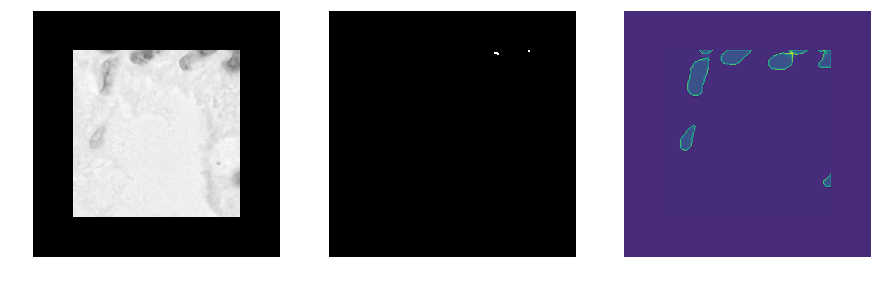

1 torch.Size([4, 3, 572, 572]) torch.Size([4, 3, 572, 572]) torch.Size([4, 1, 572, 572])
0.0 184.25689697265625 torch.Size([572, 572])
0.0 1.0 torch.Size([572, 572])
-2.0298688411712646 22.9971981048584 torch.Size([572, 572])


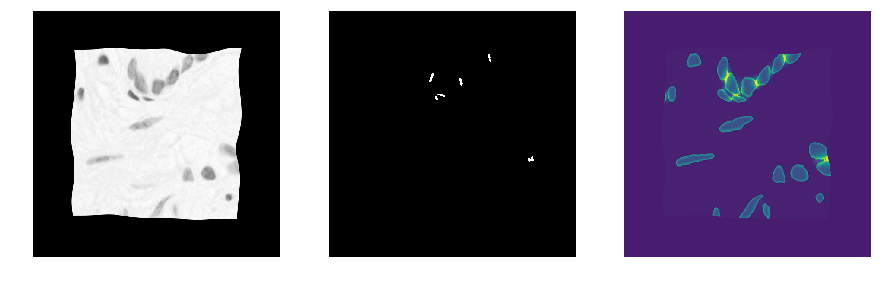

2 torch.Size([1, 3, 572, 572]) torch.Size([1, 3, 572, 572]) torch.Size([1, 1, 572, 572])
0.0 189.0 torch.Size([572, 572])
0.0 1.0 torch.Size([572, 572])
-0.5101034045219421 15.955391883850098 torch.Size([572, 572])


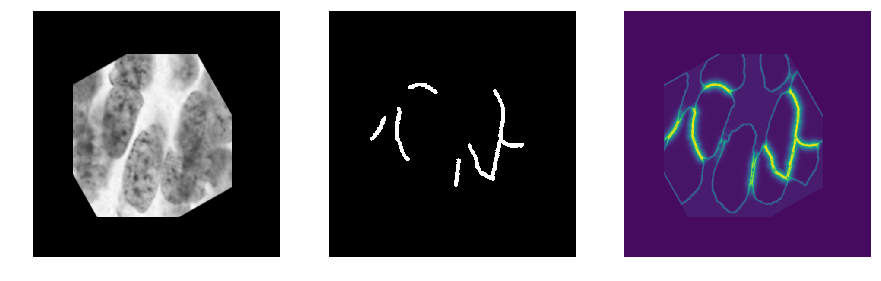

In [9]:

pathdataset     = '../db'
namedataset     = 'databoewlex'
sub_folder      =  'train'
folders_images  = 'images'
folders_labels  = 'labels'
folders_weights = 'weights'

base_folder = os.path.join(pathdataset, namedataset) 


data = dsxbdata.DSXBDataset(
        base_folder, 
        sub_folder, 
        transform=transforms.Compose([
            #dsxbtrans.ElasticDistort(size_grid=50, deform=15),
            dsxbtrans.GeometricDistort(angle=360, translation=0.2, warp=0.01),
            dsxbtrans.ColorDistort(),
            dsxbtrans.UnetResize(imsize=388),            
            dsxbtrans.ToTensor(),
            dsxbtrans.ElasticTorchDistort(size_grid=10, deform=0.05),
            ])
        )

dataloader = DataLoader(data, batch_size=4, shuffle=True, num_workers=1 )

label_batched = []
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['label'].size(),
          sample_batched['weight'].size()
    
         )
    
    image = sample_batched['image'][0,0,...]
    label = sample_batched['label'][0,2,...]
    weight = sample_batched['weight'][0,0,...]
    
    print(torch.min(image), torch.max(image), image.shape )
    print(torch.min(label), torch.max(label), image.shape )
    print(torch.min(weight), torch.max(weight), image.shape )

    # observe 4th batch and stop.
    if i_batch == 4: 
        break
        
    plt.figure( figsize=(15,15) )
    plt.subplot(131)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.ioff()

    plt.subplot(132)
    plt.imshow(label, cmap='gray')
    plt.axis('off')
    plt.ioff()

    plt.subplot(133)
    plt.imshow(weight)
    plt.axis('off')
    plt.ioff()       

    plt.show()        
        